In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import datetime

from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
# !pip install pmdarima
import pmdarima as pm
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.ar_model import AutoReg, ar_select_order
from statsmodels.tsa.statespace.sarimax import SARIMAX
from tqdm import tqdm_notebook
from itertools import product
from sklearn.metrics import mean_absolute_error, accuracy_score







In [49]:
df_rainfall = pd.read_csv(r'C:\Users\Admin\OneDrive\Desktop\SDSP\Project\Climate344 (1).csv', parse_dates= ['Local []'], index_col= 'Local []')
df_rainfall

C:\Users\Admin\AppData\Local\Temp\ipykernel_11664\1448264168.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_rainfall = pd.read_csv(r'C:\Users\Admin\OneDrive\Desktop\SDSP\Project\Climate344 (1).csv', parse_dates= ['Local []'], index_col= 'Local []')


,ID [],Irradiance [W/m^2],T_ambient [Degrees Celsius],T_ground [Degrees Celsius],Wind [m/s],Cloud [okta],Pressure [Pa],Rain [mm/hr],Diffuse [W/m^2],Direct [W/m^2],Elevation [Degrees],Azimuth [Degrees]
Local [],,,,,,,,,,,,
0000-01-01 00:30:00,1,0.010,3.384,1.970,4.821,5.705,101556.821,0.030,0.010,0.0,-59.798,20.675
0000-01-01 01:30:00,2,0.005,3.349,1.907,4.795,5.364,101561.383,0.084,0.005,0.0,-54.787,44.647
0000-01-01 02:30:00,3,0.010,3.165,1.846,4.765,5.383,101553.274,0.143,0.010,0.0,-47.316,63.225
0000-01-01 03:30:00,4,0.028,3.182,1.801,4.971,5.746,101551.339,0.147,0.028,0.0,-38.614,77.931
0000-01-01 04:30:00,5,0.005,3.021,1.730,4.803,4.922,101539.682,0.100,0.005,0.0,-29.439,90.405
...,...,...,...,...,...,...,...,...,...,...,...,...
0000-12-31 19:30:00,8780,0.018,3.833,2.814,4.575,6.695,101596.428,0.093,0.018,0.0,-33.935,275.428
0000-12-31 20:30:00,8781,0.000,3.705,2.655,4.655,6.352,101596.095,0.072,0.000,0.0,-42.948,288.816
0000-12-31 21:30:00,8782,0.000,3.625,2.431,4.534,6.434,101589.142,0.059,0.000,0.0,-51.169,305.177


In [50]:
df_rainfall.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8784 entries, 0000-01-01 00:30:00 to 0000-12-31 23:30:00
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID []                        8784 non-null   int64  
 1   Irradiance [W/m^2]           8784 non-null   float64
 2   T_ambient [Degrees Celsius]  8784 non-null   float64
 3   T_ground [Degrees Celsius]   8784 non-null   float64
 4   Wind [m/s]                   8784 non-null   float64
 5   Cloud [okta]                 8784 non-null   float64
 6   Pressure [Pa]                8784 non-null   float64
 7   Rain [mm/hr]                 8784 non-null   float64
 8   Diffuse [W/m^2]              8784 non-null   float64
 9   Direct [W/m^2]               8784 non-null   float64
 10  Elevation [Degrees]          8784 non-null   float64
 11  Azimuth [Degrees]            8784 non-null   float64
dtypes: float64(11), int64(1)
memory usage: 892.1+ KB

In [51]:
df_rainfall.index = pd.to_datetime(df_rainfall.index.str.replace('0000', '2024'))
df_rainfall.index = pd.to_datetime(df_rainfall.index)

df_monthly_rainfall = df_rainfall['Rain [mm/hr]'].resample('M').sum()
# df_monthly_rainfall
df_hourly_rainfall = df_rainfall['Rain [mm/hr]'].resample('h').sum()
df_weekly_rainfall = df_rainfall['Rain [mm/hr]'].resample('W').sum()
df_daily_rainfall = df_rainfall['Rain [mm/hr]'].resample('D').sum()


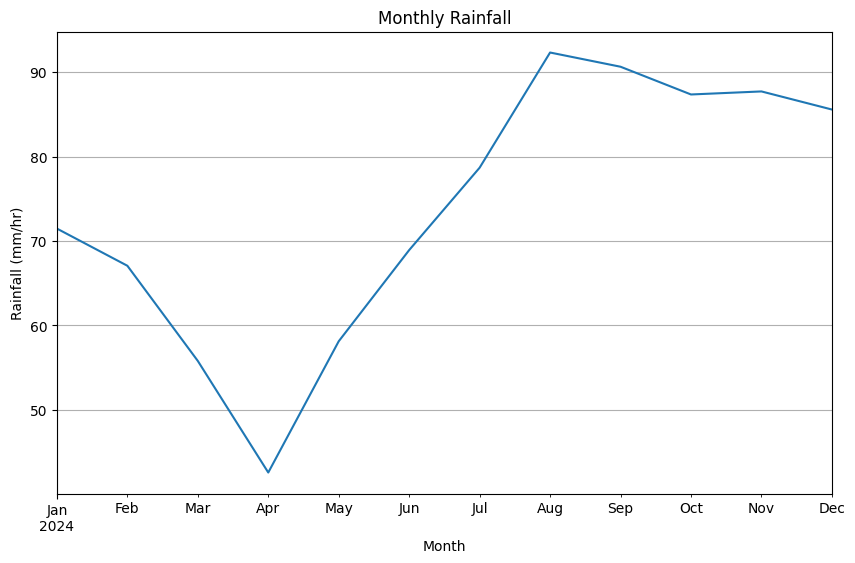

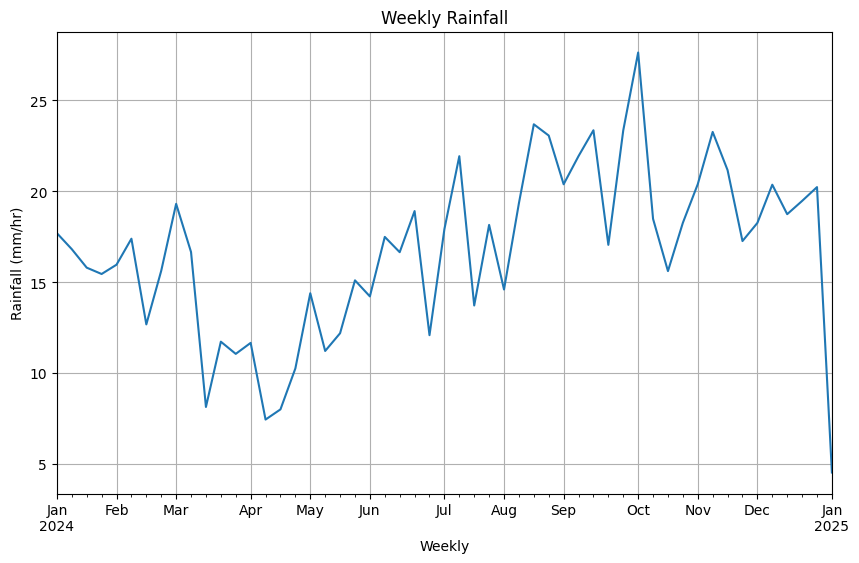

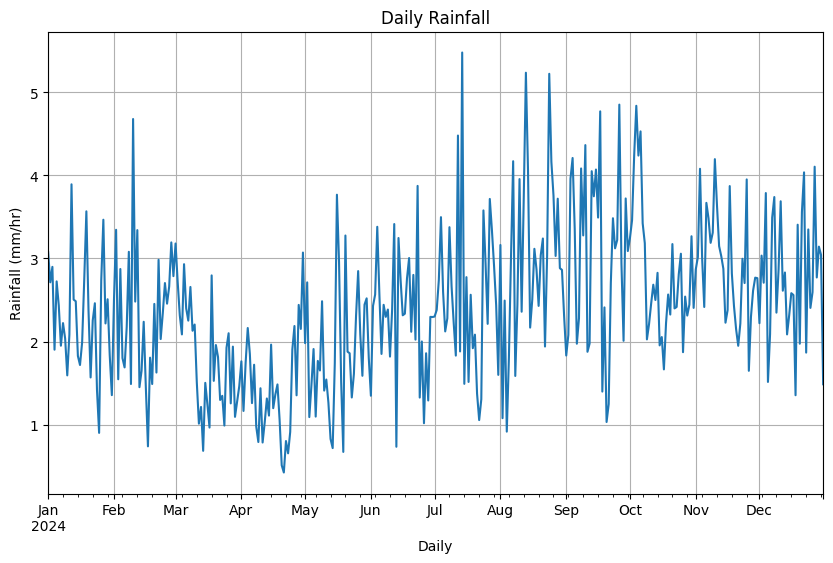

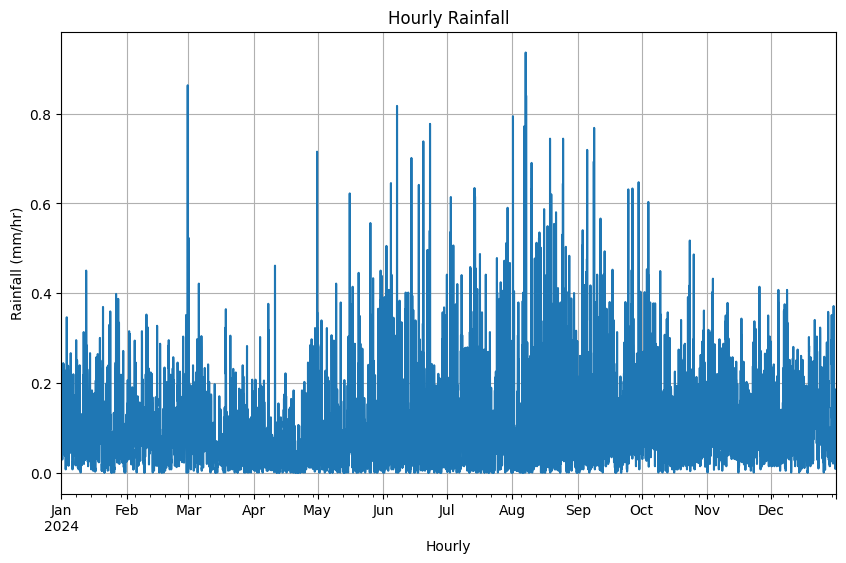

In [52]:
df_monthly_rainfall.plot(figsize = (10,6), title = 'Monthly Rainfall')
plt.xlabel('Month')
plt.ylabel('Rainfall (mm/hr)')
plt.grid(True)
plt.show()
df_weekly_rainfall.plot(figsize = (10,6), title = 'Weekly Rainfall')
plt.xlabel('Weekly')
plt.ylabel('Rainfall (mm/hr)')
plt.grid(True)
plt.show()
df_daily_rainfall.plot(figsize = (10,6), title = 'Daily Rainfall')
plt.xlabel('Daily')
plt.ylabel('Rainfall (mm/hr)')
plt.grid(True)
plt.show()
df_hourly_rainfall.plot(figsize = (10,6), title = 'Hourly Rainfall')
plt.xlabel('Hourly')
plt.ylabel('Rainfall (mm/hr)')
plt.grid(True)
plt.show()

In [53]:
##Check for stationarity
def check_stationarity(df):
    result = adfuller(df)
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))
    if result[1] > 0.05:
        print('Data is not stationary')
    else:
        print('Data is stationary')

# check_stationarity(df_monthly_rainfall)
# check_stationarity(df_weekly_rainfall)
check_stationarity(df_daily_rainfall)
check_stationarity(df_hourly_rainfall)


ADF Statistic: -5.429859
p-value: 0.000003
Critical Values:
	1%: -3.449
	5%: -2.870
	10%: -2.571
Data is stationary
ADF Statistic: -11.195896
p-value: 0.000000
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567
Data is stationary


In [54]:
##Make data stationary
df_monthly_rainfall_diff = df_monthly_rainfall.diff().dropna()
df_weekly_rainfall_diff = df_weekly_rainfall.diff().dropna()
df_weekly_rainfall_diff2 = df_weekly_rainfall_diff.diff().dropna()

print(df_monthly_rainfall_diff)
print(df_weekly_rainfall_diff)

Local []
2024-02-29    -4.402
2024-03-31   -11.269
2024-04-30   -13.211
2024-05-31    15.539
2024-06-30    10.798
2024-07-31     9.753
2024-08-31    13.636
2024-09-30    -1.683
2024-10-31    -3.284
2024-11-30     0.360
2024-12-31    -2.142
Freq: M, Name: Rain [mm/hr], dtype: float64
Local []
2024-01-14    -0.882
2024-01-21    -1.016
2024-01-28    -0.349
2024-02-04     0.512
2024-02-11     1.430
2024-02-18    -4.715
2024-02-25     2.951
2024-03-03     3.682
2024-03-10    -2.651
2024-03-17    -8.524
2024-03-24     3.591
2024-03-31    -0.671
2024-04-07     0.605
2024-04-14    -4.219
2024-04-21     0.560
2024-04-28     2.252
2024-05-05     4.139
2024-05-12    -3.177
2024-05-19     0.975
2024-05-26     2.911
2024-06-02    -0.884
2024-06-09     3.274
2024-06-16    -0.841
2024-06-23     2.263
2024-06-30    -6.829
2024-07-07     5.834
2024-07-14     4.013
2024-07-21    -8.213
2024-07-28     4.434
2024-08-04    -3.556
2024-08-11     4.750
2024-08-18     4.341
2024-08-25    -0.620
2024-09-01    

In [55]:

def check_stationarity(df):
    result = adfuller(df)
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))
    if result[1] > 0.05:
        print('Data is not stationary')
    else:
        print('Data is stationary')

check_stationarity(df_monthly_rainfall_diff)
check_stationarity(df_weekly_rainfall_diff2)

ADF Statistic: -25.296802
p-value: 0.000000
Critical Values:
	1%: -4.939
	5%: -3.478
	10%: -2.844
Data is stationary
ADF Statistic: -3.317065
p-value: 0.014133
Critical Values:
	1%: -3.610
	5%: -2.939
	10%: -2.608
Data is stationary


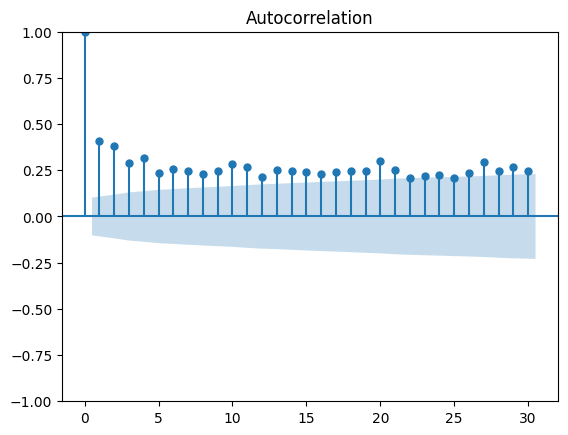

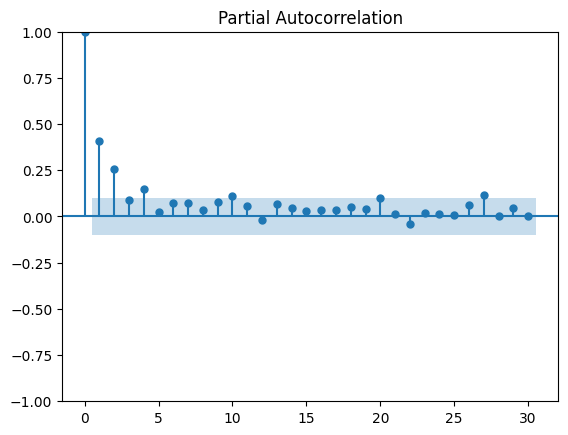

In [56]:
plot_acf(df_daily_rainfall, lags = 30)
plot_pacf(df_daily_rainfall, lags = 30)
plt.show()

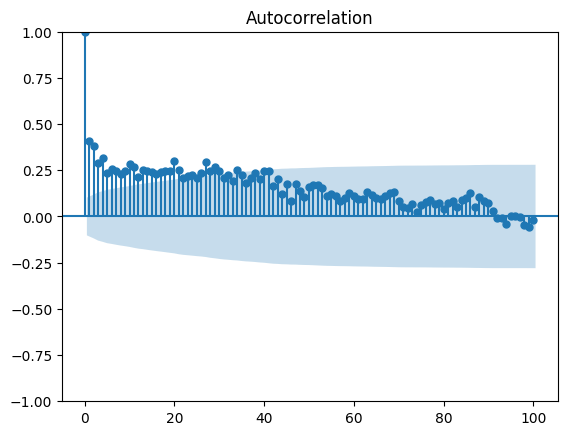

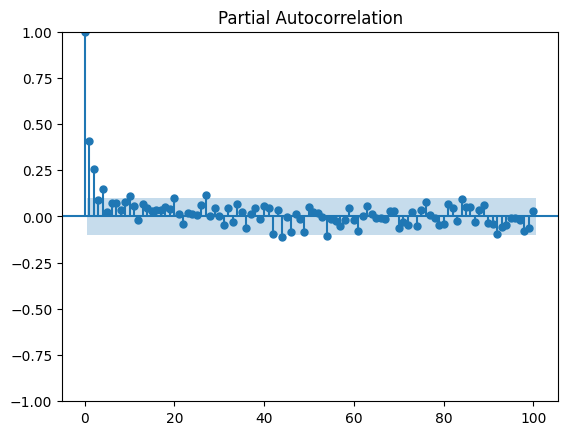

In [58]:
##ACF and PACF 
plot_acf(df_daily_rainfall, lags = 100)
plot_pacf(df_daily_rainfall, lags = 100)
plt.show()

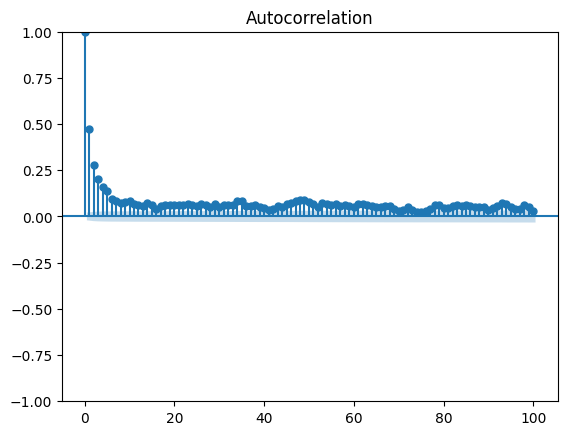

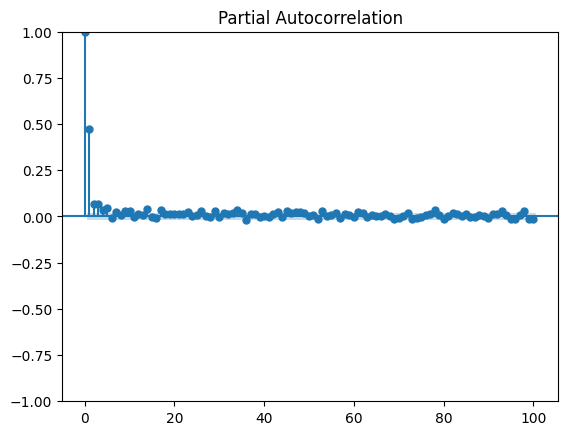

In [59]:
plot_acf(df_hourly_rainfall, lags = 100)
plot_pacf(df_hourly_rainfall, lags = 100)
plt.show()

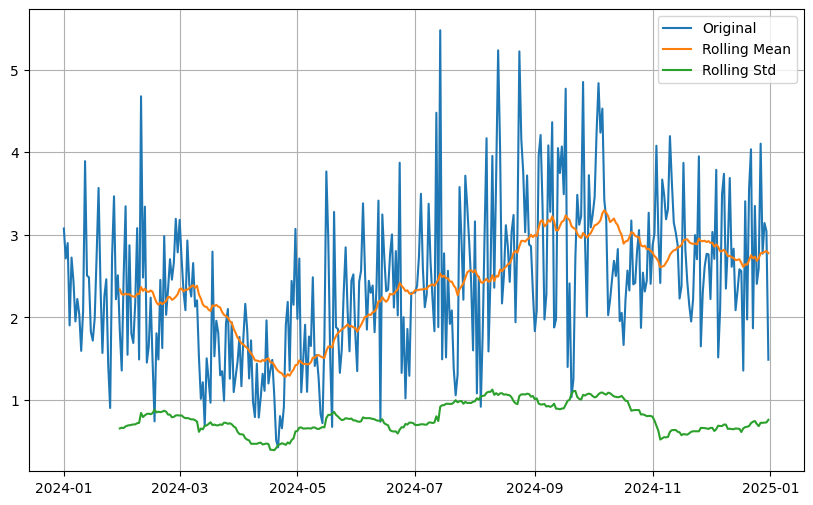

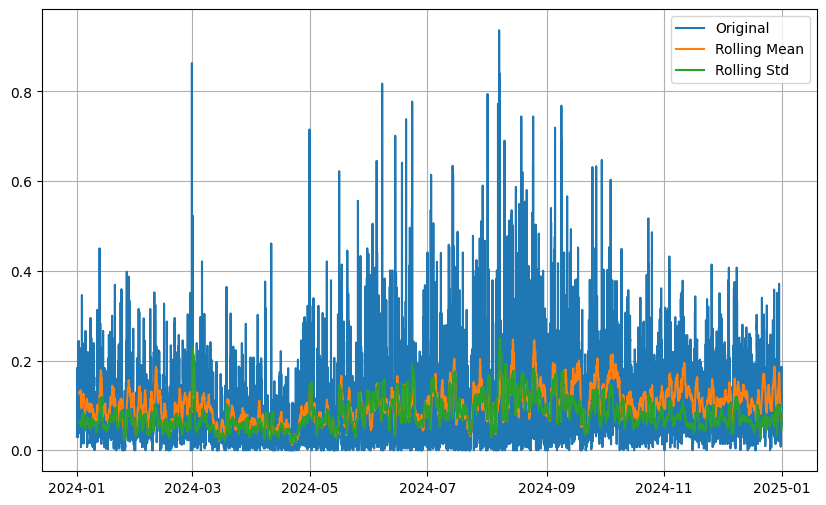

In [60]:
##Rolling mean & stddev
def plot_rolling_mean_std(df, window):
    rolling_mean = df.rolling(window = window).mean()
    rolling_std = df.rolling(window = window).std()
    plt.figure(figsize = (10,6))
    plt.plot(df, label = 'Original')
    plt.plot(rolling_mean, label = 'Rolling Mean')
    plt.plot(rolling_std, label = 'Rolling Std')
    plt.grid(True)
    plt.legend()
    plt.show()

plot_rolling_mean_std(df_daily_rainfall, 30)
plot_rolling_mean_std(df_hourly_rainfall, 30)

In [75]:
train_daily = df_daily_rainfall.loc[:'2024-9-10']
test_daily = df_daily_rainfall.loc['2024-9-11':]

train_hourly = df_hourly_rainfall.loc[:'2024-9-10']
test_hourly = df_hourly_rainfall.loc['2024-9-11':]

In [82]:
##ARiMA model for hourly
# model = pm.auto_arima(train_daily, seasonal = True, m=7)
# model.summary()
model = ARIMA(train_daily, order=(90,0,1)).fit()
model.summary()


c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:           Rain [mm/hr]   No. Observations:                  254
Model:                ARIMA(90, 0, 1)   Log Likelihood                -260.402
Date:                Thu, 31 Oct 2024   AIC                            706.803
Time:                        01:07:31   BIC                           1035.775
Sample:                    01-01-2024   HQIC                           839.145
                         - 09-10-2024                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.3474      0.442      5.312      0.000       1.481       3.214
ar.L1          0.0725      3.733      0.019      0.985      -7.244       7.389
ar.L2          0.1935      0.868      0.223      0.824      -1.508       1.895
ar.L3         -0.0738      0.593     -0.124      0.901      -1.236       1.088
ar.L4          0.2252      0.382      0.590      0.555      -0.523       0.973
ar.L5         -0.0305      0.919     -0.033      0.973      -1.831       1.770
ar.L6          0.0417      0.270      0.154      0.877      -0.488       0.571
ar.L7          0.0239      0.218      0.109      0.913      -0.403       0.451
ar.L8         -0.0644      0.111     -0.581      0.561      -0.281       0.153
ar.L9          0.0162      0.266      0.061      0.951      -0.504       0.537
ar.L10         0.0534      0.126      0.423      0.672      -0.194       0.301
ar.L11         0.0883      0.214      0.412      0.680      -0.332       0.509
ar.L12         0.0080      0.333      0.024      0.981      -0.646       0.662
ar.L13        -0.0527      0.104     -0.508      0.612      -0.256       0.151
ar.L14         0.1475      0.229      0.644      0.520      -0.302       0.597
ar.L15         0.0988      0.594      0.166      0.868      -1.064       1.262
ar.L16        -0.0134      0.307     -0.044      0.965      -0.614       0.588
ar.L17         0.0532      0.144      0.368      0.713      -0.230       0.336
ar.L18        -0.0154      0.242     -0.064      0.949      -0.490       0.459
ar.L19         0.0225      0.130      0.173      0.863      -0.233       0.278
ar.L20         0.1368      0.126      1.090      0.276      -0.109       0.383
ar.L21         0.0470      0.505      0.093      0.926      -0.942       1.036
ar.L22        -0.0041      0.130     -0.032      0.975      -0.259       0.251
ar.L23        -0.0164      0.116     -0.141      0.888      -0.244       0.212
ar.L24         0.0305      0.105      0.291      0.771      -0.175       0.236
ar.L25        -0.0491      0.144     -0.340      0.734      -0.332       0.234
ar.L26        -0.0608      0.230     -0.264      0.791      -0.512       0.390
ar.L27         0.2031      0.224      0.907      0.364      -0.235       0.642
ar.L28        -0.0145      0.772     -0.019      0.985      -1.527       1.498
ar.L29         0.0836      0.205      0.408      0.683      -0.318       0.485
ar.L30         0.0448      0.364      0.123      0.902      -0.669       0.759
ar.L31        -0.1320      0.133     -0.995      0.320      -0.392       0.128
ar.L32         0.0473      0.553      0.086      0.932      -1.037       1.132
ar.L33        -0.1111      0.286     -0.389      0.697      -0.671       0.449
ar.L34         0.0112      0.462      0.024      0.981      -0.895       0.917
ar.L35         0.0438      0.173      0.253      0.800      -0.296       0.383
ar.L36        -0.0811      0.188     -0.431      0.666      -0.450       0.288
ar.L37         0.0469      0.327      0.144      0.886      -0.594       0.687
ar

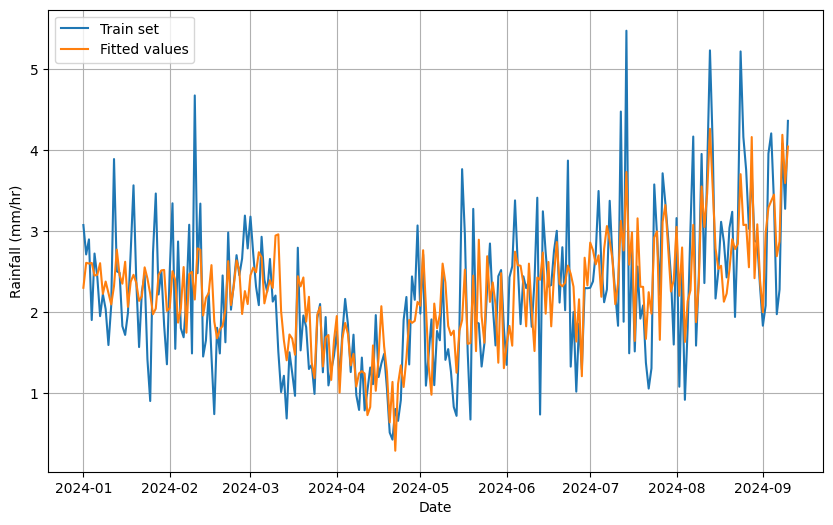

In [78]:
fitted_daily = model.fittedvalues
plt.figure(figsize = (10,6))

plt.plot(train_daily, label = 'Train set')
plt.plot(fitted_daily, label = 'Fitted values')
plt.legend()
plt.grid(True)
plt.xlabel('Date')
plt.ylabel('Rainfall (mm/hr)')
plt.show()

In [17]:
model.arparams
model.maparams


array([-0.16147553])

Local []
2024-09-11    1.877
2024-09-12    1.975
2024-09-13    4.050
2024-09-14    3.748
2024-09-15    4.070
              ...  
2024-12-27    4.104
2024-12-28    2.771
2024-12-29    3.142
2024-12-30    3.043
2024-12-31    1.486
Freq: D, Name: Rain [mm/hr], Length: 112, dtype: float64
2024-09-11    2.510375
2024-09-12    2.935302
2024-09-13    2.549995
2024-09-14    3.336421
2024-09-15    4.161364
                ...   
2024-12-27    2.038852
2024-12-28    1.868827
2024-12-29    2.194057
2024-12-30    2.219541
2024-12-31    1.830797
Freq: D, Name: predicted_mean, Length: 112, dtype: float64
112
112


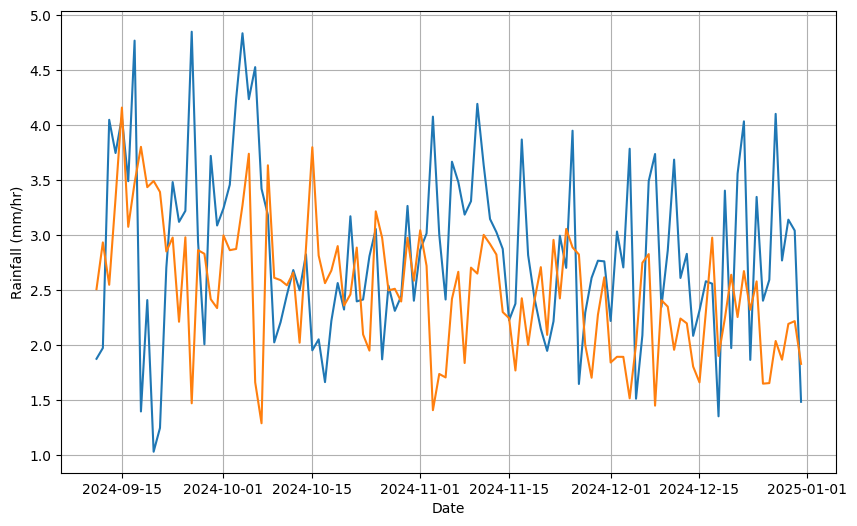

In [83]:
result = model.predict(start=test_daily.index[0], end = test_daily.index[-1])
print(test_daily)
print(result)

figure = plt.figure(figsize = (10,6))

plt.plot(test_daily)
plt.plot(result)
plt.grid(True)
plt.xlabel('Date')
plt.ylabel('Rainfall (mm/hr)')
print(len(result))
print(len(test_daily))



In [84]:
rms_daily = np.sqrt(np.mean(np.square(result - test_daily)))
print(rms_daily)
##MAE
mae = mean_absolute_error(test_daily, result)
print(mae)

1.0494081700598998
0.8027324189181233


In [93]:
model_hr_fit = AutoReg(train_hourly, 900).fit()

# model_hr_fit = AutoReg(train_hourly, 1000).fit()
# model_hr_fit = AutoReg(train_hourly, 100).fit()
# model_hr_fit = AutoReg(train_hourly, 500).fit()
model_hr_fit.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                            AutoReg Model Results                             
==============================================================================
Dep. Variable:           Rain [mm/hr]   No. Observations:                 6096
Model:                   AutoReg(900)   Log Likelihood                5761.149
Method:               Conditional MLE   S.D. of innovations              0.080
Date:                Thu, 31 Oct 2024   AIC                          -9718.299
Time:                        01:15:33   BIC                          -3805.107
Sample:                    02-07-2024   HQIC                         -7649.848
                         - 09-10-2024                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.0038      0.006      0.641      0.521      -0.008       0.015
Rain [mm/hr].L1       0.3896      0.014     28.095      0.000       0.362       0.417
Rain [mm/hr].L2       0.0330      0.015      2.216      0.027       0.004       0.062
Rain [mm/hr].L3       0.0351      0.015      2.359      0.018       0.006       0.064
Rain [mm/hr].L4      -0.0035      0.015     -0.236      0.814      -0.033       0.026
Rain [mm/hr].L5       0.0490      0.015      3.287      0.001       0.020       0.078
Rain [mm/hr].L6      -0.0205      0.015     -1.374      0.169      -0.050       0.009
Rain [mm/hr].L7       0.0275      0.015      1.844      0.065      -0.002       0.057
Rain [mm/hr].L8      -0.0026      0.015     -0.173      0.862      -0.032       0.027
Rain [mm/hr].L9       0.0261      0.015      1.748      0.080      -0.003       0.055
Rain [mm/hr].L10      0.0249      0.015      1.665      0.096      -0.004       0.054
Rain [mm/hr].L11     -0.0294      0.015     -1.969      0.049      -0.059      -0.000
Rain [mm/hr].L12      0.0158      0.015      1.056      0.291      -0.014       0.045
Rain [mm/hr].L13     -0.0148      0.015     -0.989      0.323      -0.044       0.015
Rain [mm/hr].L14      0.0252      0.015      1.683      0.092      -0.004       0.054
Rain [mm/hr].L15     -0.0052      0.015     -0.348      0.728      -0.035       0.024
Rain [mm/hr].L16     -0.0328      0.015     -2.195      0.028      -0.062      -0.004
Rain [mm/hr].L17      0.0234      0.015      1.563      0.118      -0.006       0.053
Rain [mm/hr].L18      0.0059      0.015      0.391      0.696      -0.023       0.035
Rain [mm/hr].L19     -0.0026      0.015     -0.172      0.864      -0.032       0.027
Rain [mm/hr].L20     -0.0021      0.015     -0.141      0.888      -0.031       0.027
Rain [mm/hr].L21      0.0078      0.015      0.521      0.602      -0.022       0.037
Rain [mm/hr].L22      0.0147      0.015      0.984      0.325      -0.015       0.044
Rain [mm/hr].L23      0.0318      0.015      2.126      0.034       0.002       0.061
Rain [mm/hr].L24     -0.0138      0.015     -0.919      0.358      -0.043       0.016
Rain [mm/hr].L25     -0.0120      0.015     -0.803      0.422      -0.041       0.017
Rain [mm/hr].L26      0.0217      0.015      1.447      0.148      -0.008       0.051
Rain [mm/hr].L27     -0.0235      0.015     -1.569      0.117      -0.053       0.006
Rain [mm/hr].L28      0.0152      0.015      1.014      0.310      -0.014       0.045
Rain [mm/hr].L29      0.0295      0.015      1.968      0.049       0.000       0.059
Rain [mm/hr].L30     -0.0289      0.015     -1.925      0.054      -0.058       0.001
Rain [mm/hr].L31     -0.0018      0.015     -0.121      0.903      -0.031       0.028
Rain [mm/hr].L32     -0.0004      0.015     -0.025      0.980      -0.030       0.029
Rain [mm/hr].L33     -0.0018      0.015     -0.121      0.904      -0.031       0.028
Rain [mm/hr].L34      0.0269      0.015      1.793      0.0

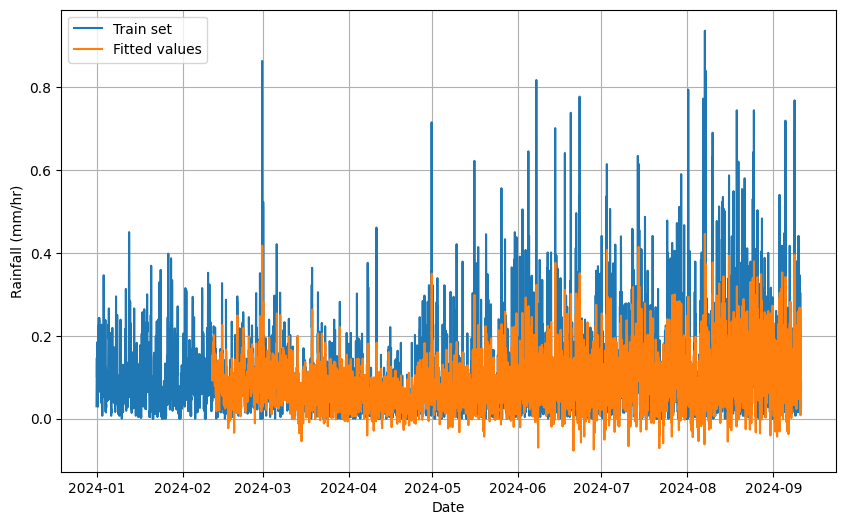

0


In [73]:
##Fitted values on training set
fitted = model_hr_fit.fittedvalues
plt.figure(figsize = (10,6))

plt.plot(train_hourly, label = 'Train set')
plt.plot(fitted, label = 'Fitted values')
plt.legend()
plt.grid(True)
plt.xlabel('Date')
plt.ylabel('Rainfall (mm/hr)')
plt.show()

##Nan values
print(fitted.isnull().sum())


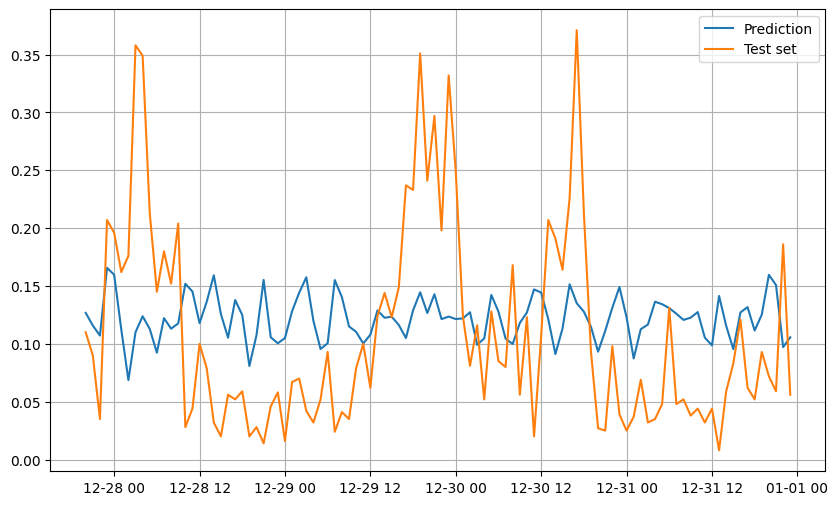

In [94]:
forecast = model_hr_fit.predict(start = test_hourly.index[-100], end = test_hourly.index[-1])
plt.figure(figsize = (10,6))
plt.plot(forecast, label = 'Prediction')
plt.plot(test_hourly[-100:], label = 'Test set')
plt.legend()
plt.grid(True)
plt.show()
# print(forecast)
# print(test_hourly[-50:])






In [95]:
mae = mean_absolute_error(forecast, test_hourly[-100:])
rms = np.sqrt(np.mean(np.square(forecast - test_hourly[-100:])))
print(mae)
print(rms)

0.07368412279956234
0.08916798890159552
